In [3]:
from google.colab import files
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset.csv


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


#Data analysis and preprocessing



###dataset info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

###gender analysis

In [19]:
#  unique value of each colum just the number

for column in df.columns:
  print(f"{column}: {df[column].nunique()}")

Name: 9378
Age: 68
Gender: 2
Blood Type: 8
Medical Condition: 6
Date of Admission: 1815
Doctor: 9416
Hospital: 8639
Insurance Provider: 5
Billing Amount: 10000
Room Number: 400
Admission Type: 3
Discharge Date: 1834
Medication: 5
Test Results: 3


In [50]:
# prompt: print unique name the values in column Test Results , Blood Type,Medical Condition

for column in [ 'Blood Type', 'Medical Condition','Test Results']:
  print(f"Unique values in {column}: {df[column].unique()}")

Unique values in Blood Type: ['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']
Unique values in Medical Condition: ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
Unique values in Test Results: ['Inconclusive' 'Normal' 'Abnormal']


### Distribution Count based on Medical Condition



Distribution Count based on Medical Condition:
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


<ipython-input-54-6e361dd80657>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Medical Condition', data=df, palette='viridis')


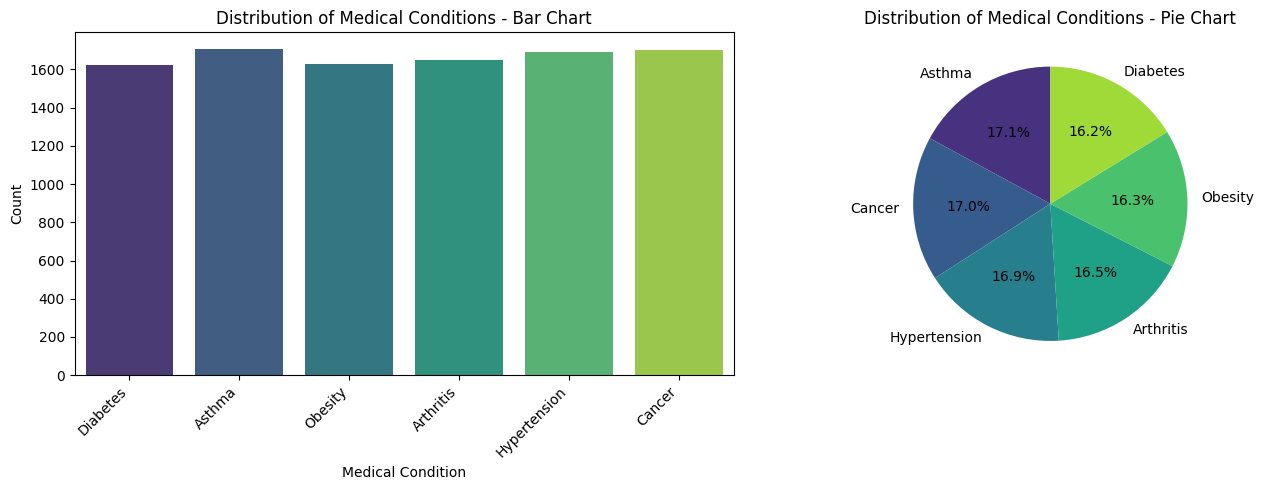

In [54]:

medical_condition_counts = df['Medical Condition'].value_counts()
print("\nDistribution Count based on Medical Condition:")
print(medical_condition_counts)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Medical Condition', data=df, palette='viridis')
plt.title('Distribution of Medical Conditions - Bar Chart')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.pie(medical_condition_counts, labels=medical_condition_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Medical Conditions - Pie Chart')

plt.tight_layout()
plt.show()


### Distribution Count based on Test Results



Distribution Count based on Test Results:
Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64


<ipython-input-52-d6e8497a8c2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Test Results', data=df, palette='viridis')


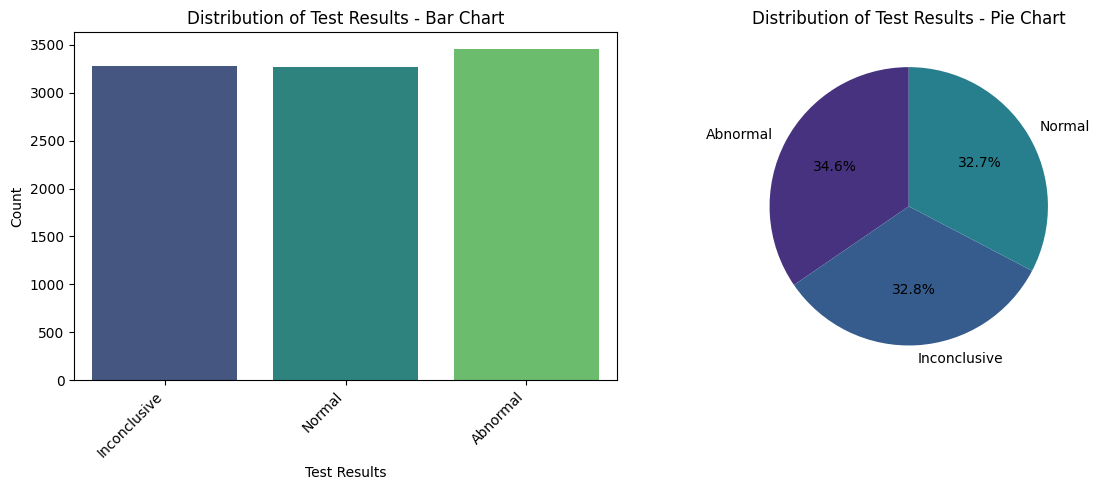

In [52]:

test_results_counts = df['Test Results'].value_counts()
print("\nDistribution Count based on Test Results:")
print(test_results_counts)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Test Results', data=df, palette='viridis')
plt.title('Distribution of Test Results - Bar Chart')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.pie(test_results_counts, labels=test_results_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Test Results - Pie Chart')

plt.tight_layout()
plt.show()


###Distribution Count based on gender



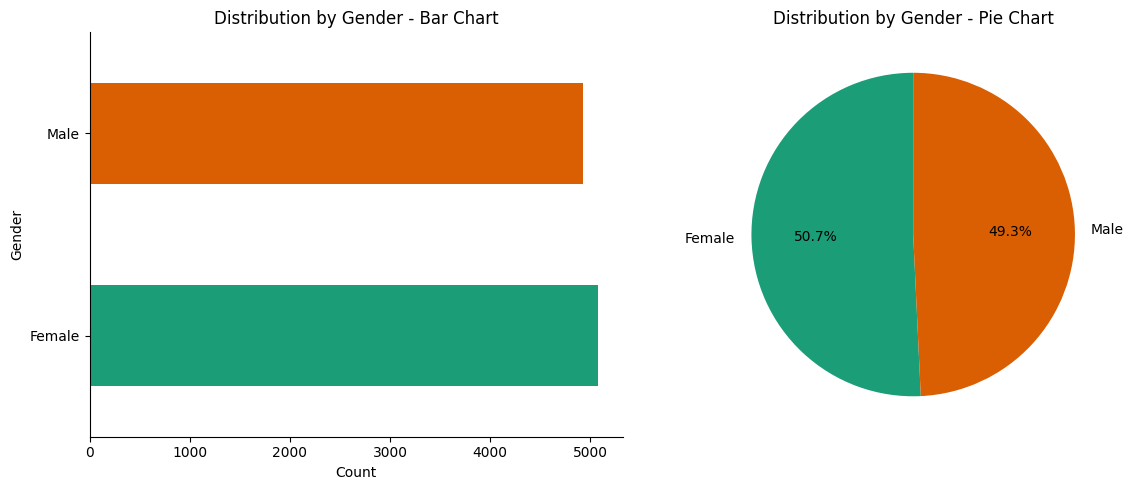

In [53]:

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
gender_counts.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Distribution by Gender - Bar Chart')
plt.xlabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Dark2'))
plt.title('Distribution by Gender - Pie Chart')

plt.tight_layout()
plt.show()


###Distribution Count based on Blood Type



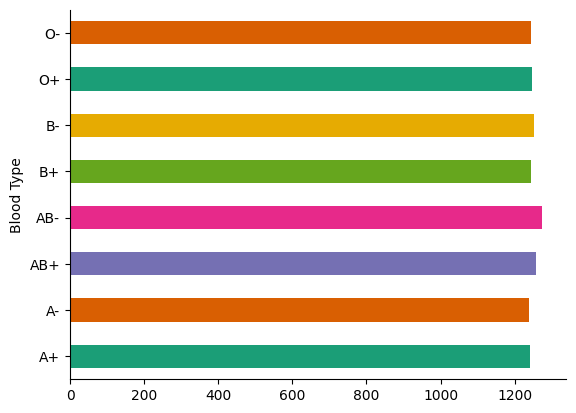

In [32]:
df.groupby('Blood Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### table of gender and Test Result



Contingency Table (Gender vs. Test Results):
Test Results  Abnormal  Inconclusive  Normal
Gender                                      
Female            1716          1696    1663
Male              1740          1581    1604


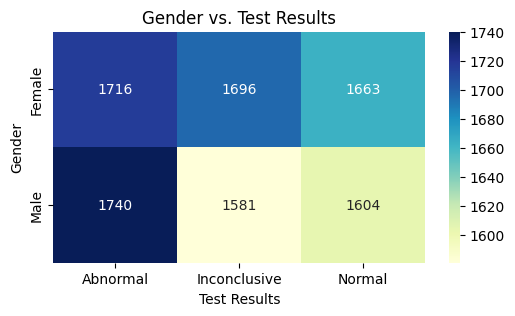

In [28]:

contingency_table = pd.crosstab(df['Gender'], df['Test Results'])

print("\nContingency Table (Gender vs. Test Results):")
print(contingency_table)

plt.figure(figsize=(6,3))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Gender vs. Test Results")
plt.xlabel("Test Results")
plt.ylabel("Gender")
plt.show()

### table of Blood Type and Test Result



Contingency Table (Blood Type  vs. Test Results):
Test Results  Abnormal  Inconclusive  Normal
Blood Type                                  
A+                 411           403     427
A-                 437           391     410
AB+                432           427     399
AB-                449           425     401
B+                 422           424     398
B-                 456           390     406
O+                 417           427     404
O-                 432           390     422


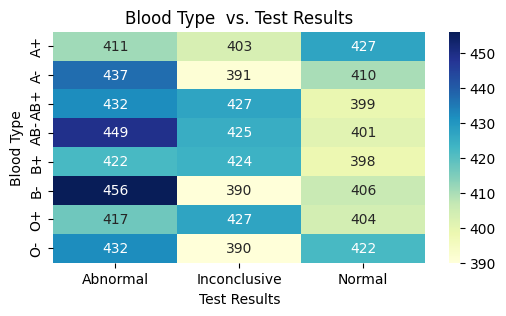

In [30]:

contingency_table = pd.crosstab(df['Blood Type'], df['Test Results'])

print("\nContingency Table (Blood Type  vs. Test Results):")
print(contingency_table)

plt.figure(figsize=(6,3))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Blood Type  vs. Test Results")
plt.xlabel("Test Results")
plt.ylabel("Blood Type")
plt.show()

### table of Medical Condition and Test Result



Contingency Table (Medical Condition vs. Test Results):
Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis               555           553     542
Asthma                  623           551     534
Cancer                  577           556     570
Diabetes                537           542     544
Hypertension            602           554     532
Obesity                 562           521     545


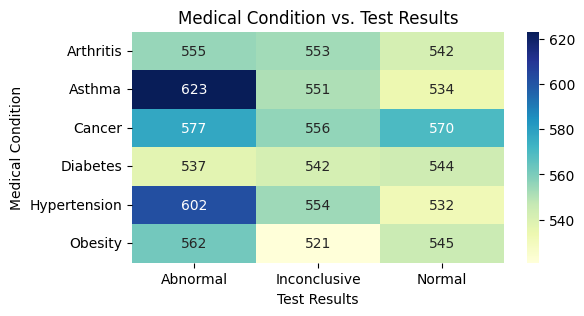

In [31]:

contingency_table = pd.crosstab(df['Medical Condition'], df['Test Results'])

print("\nContingency Table (Medical Condition vs. Test Results):")
print(contingency_table)

# You can also visualize this using a heatmap
plt.figure(figsize=(6,3))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Medical Condition vs. Test Results")
plt.xlabel("Test Results")
plt.ylabel("Medical Condition")
plt.show()

### table of Age and Test Result


<ipython-input-35-ff5deca0a358>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Age Group', 'Test Results'])['Age'].count().unstack()


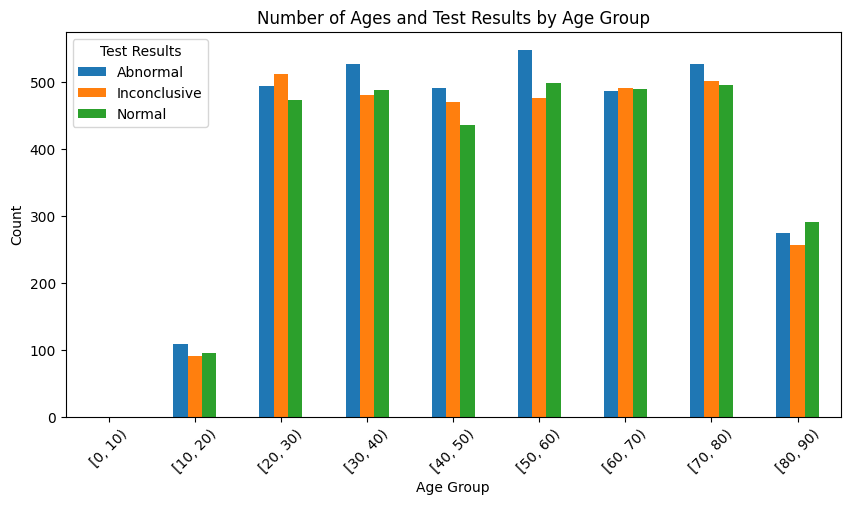

In [35]:

# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=range(0, 100, 10), right=False)

# Group by age group and test results, then count the occurrences
grouped_data = df.groupby(['Age Group', 'Test Results'])['Age'].count().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(10,5))
plt.title('Number of Ages and Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Test Results')
plt.show()

###Can Machine Learning Classification Algorithms help to predict Test Result ?

###test classification algorithms and compare their results

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode categorical features
le_gender = LabelEncoder()
le_blood_type = LabelEncoder()
le_medical_condition = LabelEncoder()
le_Medication = LabelEncoder()

le_test_results = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Blood Type'] = le_blood_type.fit_transform(df['Blood Type'])
df['Medical Condition'] = le_medical_condition.fit_transform(df['Medical Condition'])
df['Medication'] = le_Medication.fit_transform(df['Medication'])
df['Test Results'] = le_test_results.fit_transform(df['Test Results'])


# Define features (X) and target (y)
X = df[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication']]
y = df['Test Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Print results
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Accuracy: 0.3330
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.66      0.46       706
           1       0.30      0.27      0.28       636
           2       0.30      0.04      0.08       658

    accuracy                           0.33      2000
   macro avg       0.32      0.32      0.27      2000
weighted avg       0.32      0.33      0.28      2000

Confusion Matrix:
[[468 207  31]
 [431 169  36]
 [436 193  29]]

Model: Decision Tree
Accuracy: 0.3400
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.35      0.35       706
           1       0.33      0.35      0.34       636
           2       0.34      0.32      0.33       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000

Confusion Matrix:
[[245 229 232]
 [231 224 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#As a result, we can see that none of the machine learning classification algorithms can get a good accuracy in prediction